In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Path to your dataset
dataset_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Read and Display Original Images


## Preprocessing and Augmentation

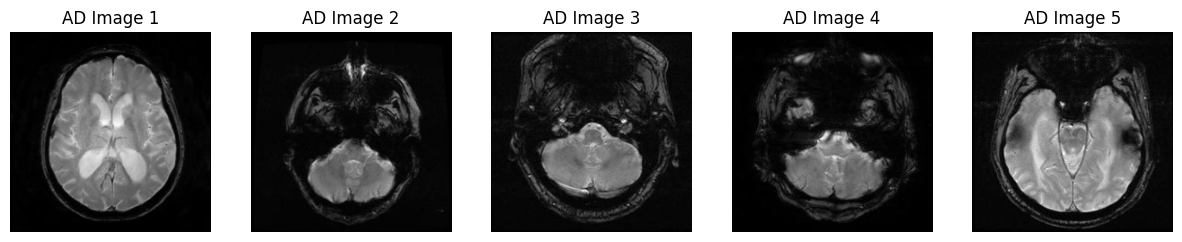

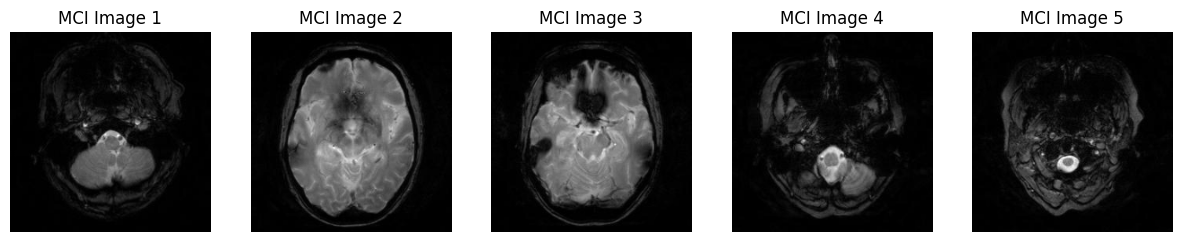

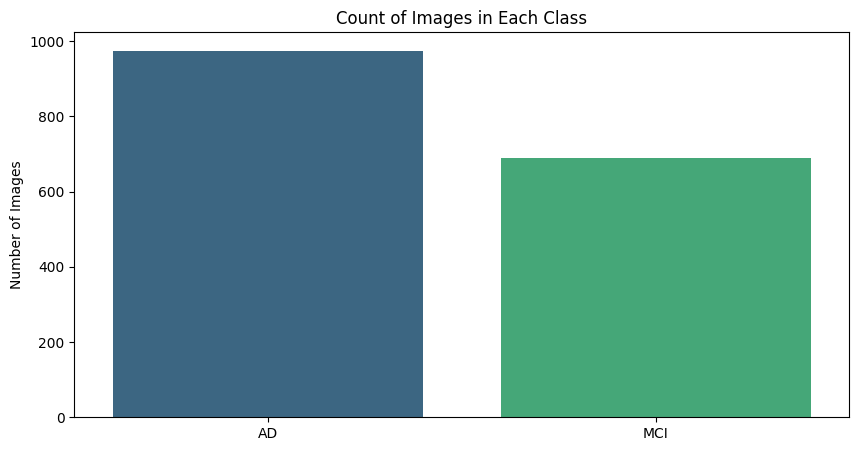

AD images count: 975
MCI images count: 689
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size = 224

# Function to load and preprocess image
def load_and_preprocess_image(image_path, grayscale=False):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error loading image: {image_path}")
        return None
    if not grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
    img = cv2.resize(img, (img_size, img_size))  # Resize the image to a specified size
    img = img.astype('float32') / 255.0  # Normalize the pixel values to the range [0, 1]
    return img

# Function to display images
def display_images(image_paths, title, grayscale=False):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img = load_and_preprocess_image(img_path, grayscale)
        if img is not None:
            plt.subplot(1, 5, i + 1)
            if grayscale:
                plt.imshow(img, cmap='gray')
            else:
                plt.imshow(img)
            plt.title(f"{title} Image {i + 1}")
            plt.axis('off')
    plt.show()

# Display some AD images
display_images(ad_images, "AD", grayscale=True)

# Display some MCI images
display_images(mci_images, "MCI", grayscale=True)

# Draw count plot of each class
ad_count = len(ad_images)
mci_count = len(mci_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD', 'MCI'], palette='viridis')
plt.title('Count of Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_images, mci_images)

## Preprocess the data like an article

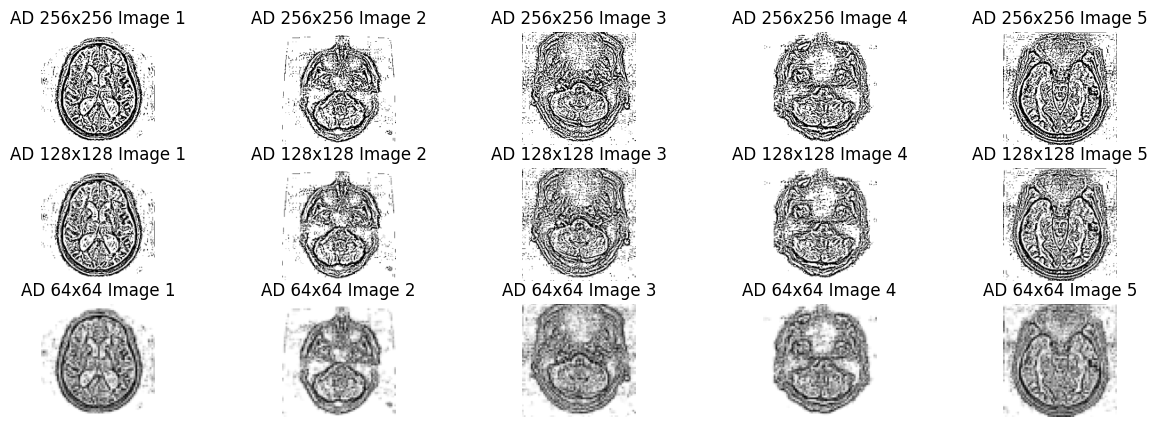

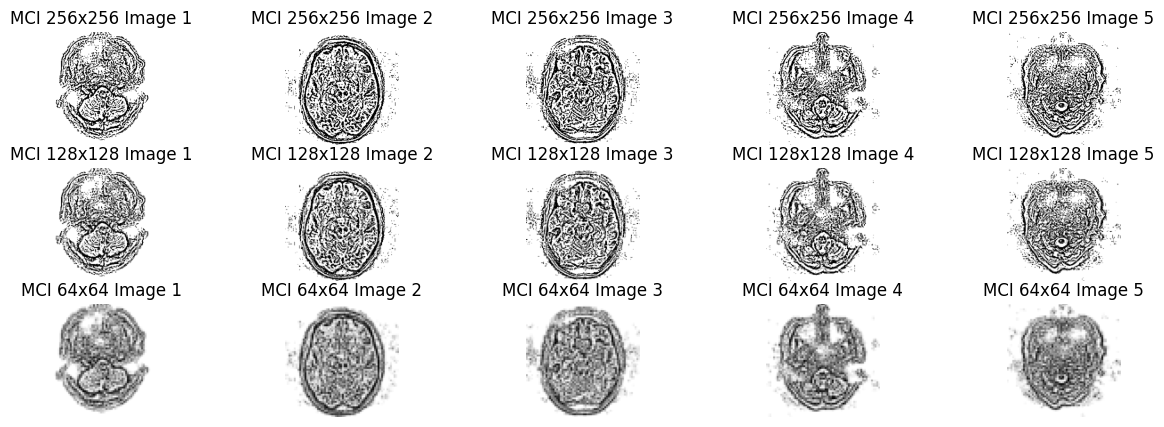

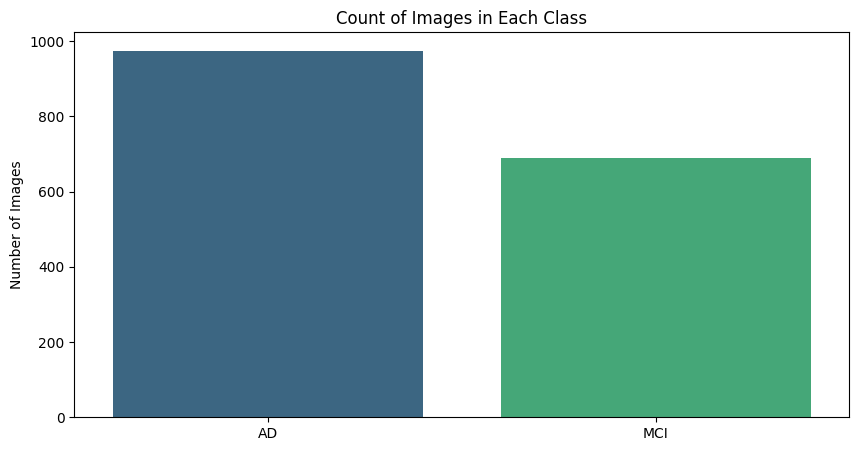

AD images count: 975
MCI images count: 689
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size_256 = (256, 256)
img_size_128 = (128, 128)
img_size_64 = (64, 64)

# Function to load, preprocess, and transform image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print(f"Error loading image: {image_path}")
        return None

    # Adaptive thresholding
    img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Crop and filter (for simplicity, we'll just resize to 256x256)
    img_resized = cv2.resize(img_thresh, img_size_256)

    # Resizing using skimage transformer
    img_128 = resize(img_resized, img_size_128, anti_aliasing=True)
    img_64 = resize(img_resized, img_size_64, anti_aliasing=True)

    return img_resized, img_128, img_64

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img_256, img_128, img_64 = load_and_preprocess_image(img_path)
        if img_256 is not None:
            plt.subplot(3, 5, i + 1)
            plt.imshow(img_256, cmap='gray')
            plt.title(f"{title} 256x256 Image {i + 1}")
            plt.axis('off')

            plt.subplot(3, 5, i + 6)
            plt.imshow(img_128, cmap='gray')
            plt.title(f"{title} 128x128 Image {i + 1}")
            plt.axis('off')

            plt.subplot(3, 5, i + 11)
            plt.imshow(img_64, cmap='gray')
            plt.title(f"{title} 64x64 Image {i + 1}")
            plt.axis('off')
    plt.show()

# Display some AD images
display_images(ad_images, "AD")

# Display some MCI images
display_images(mci_images, "MCI")

# Draw count plot of each class
ad_count = len(ad_images)
mci_count = len(mci_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD','MCI'], palette='viridis')
plt.title('Count of Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_images, mci_images)

# Step 2: Define Augmentation Functions


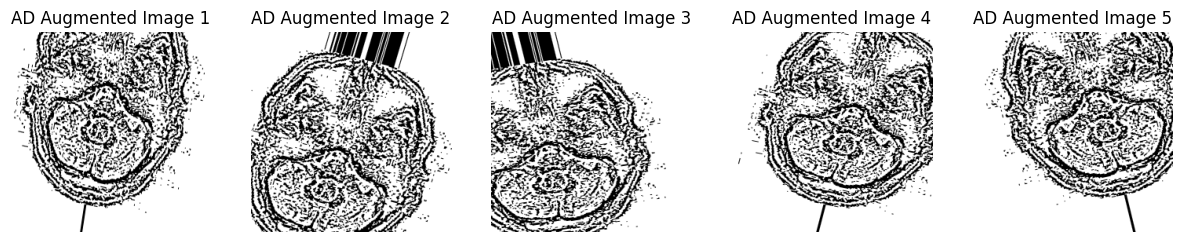

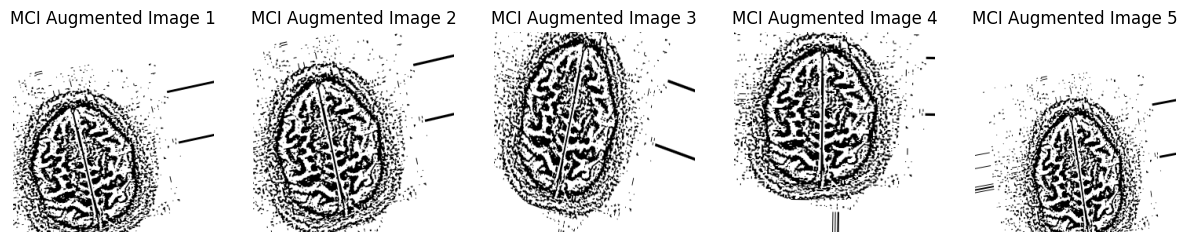

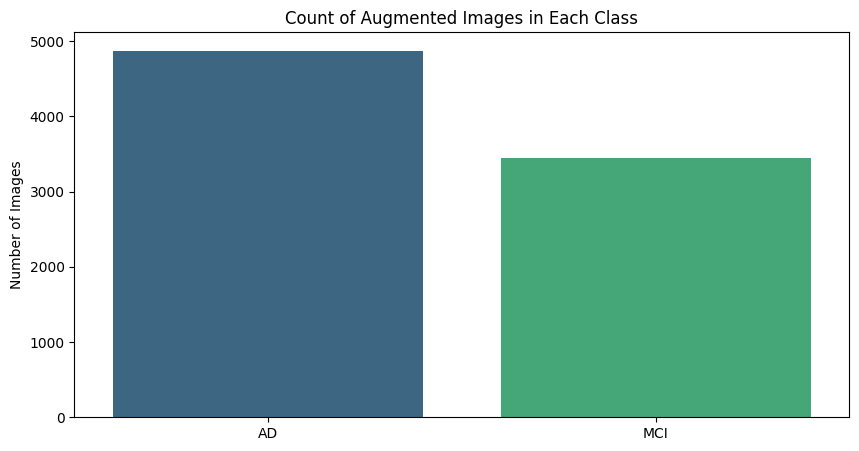

AD images count: 4875
MCI images count: 3445
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from multiprocessing import Pool, cpu_count
from PIL import Image

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'
ad_save_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD'
mci_save_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_MCI'

# Create directories to save augmented images if they don't exist
os.makedirs(ad_save_path, exist_ok=True)
os.makedirs(mci_save_path, exist_ok=True)

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory) if image.endswith('.jpg') or image.endswith('.png')]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size_256 = (256, 256)

# Function to load, preprocess, and transform image
def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert('L')  # Load as grayscale
        img = np.array(img)

        # Adaptive thresholding
        img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Resize to 256x256
        img_resized = cv2.resize(img_thresh, img_size_256)

        return img_resized
    except Exception as e:
        print(f"Error loading image: {image_path}, error: {e}")
        return None

# Data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=20,
    zoom_range=0.2
)

# Function to augment and save images in batches
def augment_and_save_images(image_paths, save_dir, total_augmentations, batch_size=32):
    count = 0
    images_needed = total_augmentations * len(image_paths)
    while count < images_needed:
        for image_path in image_paths:
            img = load_and_preprocess_image(image_path)
            if img is not None:
                img = np.expand_dims(img, axis=-1)  # Add channel dimension
                img = np.expand_dims(img, axis=0)   # Add batch dimension
                aug_iter = datagen.flow(img, batch_size=1)
                for _ in range(total_augmentations):
                    aug_img = aug_iter.next()[0].astype('uint8')
                    save_path = os.path.join(save_dir, f"augmented_{count}.png")
                    cv2.imwrite(save_path, aug_img[:, :, 0])
                    count += 1
                    if count >= images_needed:
                        break
            if count >= images_needed:
                break

# Desired number of augmentations (total images should be 5 times the original images)
total_augmentations = 5

# Augment and save AD and MCI images
augment_and_save_images(ad_images, ad_save_path, total_augmentations)
augment_and_save_images(mci_images, mci_save_path, total_augmentations)

# Display some augmented images
def display_augmented_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title} Augmented Image {i + 1}")
        plt.axis('off')
    plt.show()

# Get augmented image paths for display
ad_augmented_images = get_image_paths(ad_save_path)
mci_augmented_images = get_image_paths(mci_save_path)
display_augmented_images(ad_augmented_images, "AD")
display_augmented_images(mci_augmented_images, "MCI")

# Draw count plot of each class
ad_count = len(ad_augmented_images)
mci_count = len(mci_augmented_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD', 'MCI'], palette='viridis')
plt.title('Count of Augmented Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_augmented_images, mci_augmented_images)


## Split the dataset into training, validation, and test sets


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Paths to the directories containing the AD and MCI images
ad_save_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD'
mci_save_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory) if image.endswith('.jpg') or image.endswith('.png')]

# Get the list of image file paths for AD and MCI images
ad_augmented_images = get_image_paths(ad_save_path)
mci_augmented_images = get_image_paths(mci_save_path)

# Prepare labels for the dataset
ad_labels = [0] * len(ad_augmented_images)  # Label 0 for AD
mci_labels = [1] * len(mci_augmented_images)  # Label 1 for MCI

# Combine the datasets and labels
all_images = ad_augmented_images + mci_augmented_images
all_labels = ad_labels + mci_labels

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.2, stratify=all_labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print the sizes of each split for verification
print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")


Training set: 6656 images
Validation set: 832 images
Test set: 832 images


## check valid and invalid image

In [ ]:
from PIL import Image
import os

# Function to check if a file is a valid image file
def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()  # Verify that the file is a valid image
        return True
    except (IOError, SyntaxError) as e:
        print(f"Invalid image file: {file_path}")
        return False

# Function to check image files in a directory
def check_image_files_in_directory(directory):
    print(f"Checking image files in directory: {directory}")
    files = os.listdir(directory)
    for file_name in files:
        file_path = os.path.join(directory, file_name)
        if is_valid_image(file_path):
            print(f"Valid image file: {file_path}")
        else:
            print(f"Invalid image file: {file_path}")

# Check image files in the AD and MCI subdirectories
check_image_files_in_directory(ad_save_path)
check_image_files_in_directory(mci_save_path)


Streaming output truncated to the last 5000 lines.
Valid image file: /content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_1458.png
Valid image file: /content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_1459.png
Valid image file: /content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_1461.png
Valid image file: /content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_1460.png
Valid image file: /content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_1462.png
Valid image file: /content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_1463.png
Valid image file: /content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_1464.png
Valid image

## Import Required Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


## Proposed Model


In [ ]:
def build_proposed_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

input_shape = (256, 256, 1)  # Example input shape
proposed_model = build_proposed_model(input_shape)
proposed_model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 conv2d_33 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_35 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 61, 61, 32)        0         
 ng2D)                                               

## Compile, Fit, and Save the Model for TensorBoard

## Testing Model 1


In [ ]:
def build_testing_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_1 = build_testing_model_1(input_shape)
testing_model_1.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 123008)            0         
                                                                 
 dense_35 (Dense)            (None, 128)             

## Testing Model 2


In [ ]:
def build_testing_model_2(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_2 = build_testing_model_2(input_shape)
testing_model_2.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 conv2d_39 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 508032)            0         
                                                                 
 dense_37 (Dense)            (None, 128)               65028224  
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                     

## Import Required Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
import numpy as np
import os


  ## Proposed Model with Dropout


In [ ]:
def build_proposed_model_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

input_shape = (256, 256, 1)  # Example input shape
dropout_rate = 0.5
proposed_model_with_dropout = build_proposed_model_with_dropout(input_shape, dropout_rate)
proposed_model_with_dropout.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 conv2d_41 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_43 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 61, 61, 32)        0         
 ng2D)                                               

## Testing Model 1 with Dropout


In [ ]:
def build_testing_model_1_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_1_with_dropout = build_testing_model_1_with_dropout(input_shape, dropout_rate)
testing_model_1_with_dropout.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 123008)            0         
                                                                 
 dense_43 (Dense)            (None, 128)             

## Testing Model 2 with Dropout


In [ ]:
def build_testing_model_2_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_2_with_dropout = build_testing_model_2_with_dropout(input_shape, dropout_rate)
testing_model_2_with_dropout.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 conv2d_47 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 508032)            0         
                                                                 
 dense_45 (Dense)            (None, 128)               65028224  
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                     

## Compile and Train the Models


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical

# Define paths to save the models and TensorBoard logs
model_save_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Models'
log_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Logs'

# Make directories if they don't exist
os.makedirs(model_save_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)

# Function to compile and train a model
def compile_and_train_model(model, model_name, train_generator, val_generator, train_size, val_size, epochs=100, batch_size=32):
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define TensorBoard callback
    tensorboard_callback = TensorBoard(log_dir=os.path.join(log_dir, model_name))

    # Convert labels to categorical if needed
    def generator_with_categorical_labels(generator):
        for x, y in generator:
            yield x, to_categorical(y, num_classes=2)

    # Calculate steps per epoch
    steps_per_epoch = train_size // batch_size
    validation_steps = val_size // batch_size

    # Fit the model
    model.fit(
        generator_with_categorical_labels(train_generator),
        steps_per_epoch=steps_per_epoch,
        validation_data=generator_with_categorical_labels(val_generator),
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=[tensorboard_callback]
    )

    # Save the model
    model.save(os.path.join(model_save_dir, f'{model_name}.h5'))

# Example usage with your predefined dataset sizes:
train_size = 6656
val_size = 832
batch_size = 32
epochs = 100

compile_and_train_model(proposed_model, 'proposed_model', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_1, 'testing_model_1', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_2, 'testing_model_2', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(proposed_model_with_dropout, 'proposed_model_with_dropout', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_1_with_dropout, 'testing_model_1_with_dropout', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_2_with_dropout, 'testing_model_2_with_dropout', train_generator, val_generator, train_size, val_size, epochs, batch_size)


NameError: name 'train_generator' is not defined

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define paths to save the models and TensorBoard logs
model_save_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Models'
log_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Logs'

# Make directories if they don't exist
os.makedirs(model_save_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)


# Define the image data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create tf.data.Dataset objects for training, validation, and testing
def create_dataset(images, labels, batch_size, training=False):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    if training:
        dataset = dataset.shuffle(buffer_size=len(images))
        dataset = dataset.map(lambda x, y: (datagen.random_transform(x.numpy()), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    return dataset

batch_size = 32
train_dataset = create_dataset(X_train, y_train, batch_size, training=True)
val_dataset = create_dataset(X_val, y_val, batch_size, training=False)
test_dataset = create_dataset(X_test, y_test, batch_size, training=False)

# Function to compile and train a model
def compile_and_train_model(model, model_name, train_dataset, val_dataset, train_size, val_size, epochs=100, batch_size=32):
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define TensorBoard callback
    tensorboard_callback = TensorBoard(log_dir=os.path.join(log_dir, model_name))

    # Calculate steps per epoch
    steps_per_epoch = train_size // batch_size
    validation_steps = val_size // batch_size

    # Fit the model
    model.fit(
        train_dataset,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_dataset,
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=[tensorboard_callback]
    )

    # Save the model
    model.save(os.path.join(model_save_dir, f'{model_name}.h5'))

# Example models (replace with your actual models)
# Example usage with your predefined dataset sizes:
train_size = len(X_train)
val_size = len(X_val)
epochs = 100

# Define dummy models for example purposes
proposed_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(256, 256, 3)), tf.keras.layers.Dense(2, activation='softmax')])
testing_model_1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(256, 256, 3)), tf.keras.layers.Dense(2, activation='softmax')])
testing_model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(256, 256, 3)), tf.keras.layers.Dense(2, activation='softmax')])
proposed_model_with_dropout = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(256, 256, 3)), tf.keras.layers.Dropout(0.5), tf.keras.layers.Dense(2, activation='softmax')])
testing_model_1_with_dropout = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(256, 256, 3)), tf.keras.layers.Dropout(0.5), tf.keras.layers.Dense(2, activation='softmax')])
testing_model_2_with_dropout = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(256, 256, 3)), tf.keras.layers.Dropout(0.5), tf.keras.layers.Dense(2, activation='softmax')])

# Train the models
compile_and_train_model(proposed_model, 'proposed_model', train_dataset, val_dataset, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_1, 'testing_model_1', train_dataset, val_dataset, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_2, 'testing_model_2', train_dataset, val_dataset, train_size, val_size, epochs, batch_size)
compile_and_train_model(proposed_model_with_dropout, 'proposed_model_with_dropout', train_dataset, val_dataset, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_1_with_dropout, 'testing_model_1_with_dropout', train_dataset, val_dataset, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_2_with_dropout, 'testing_model_2_with_dropout', train_dataset, val_dataset, train_size, val_size, epochs, batch_size)

# Example: Visualize augmented images
def visualize_augmented_images(dataset, num_images=5):
    plt.figure(figsize=(15, 10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i])
            plt.title('Label: {}'.format(labels[i].numpy()))
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize some augmented images from the training set
visualize_augmented_images(train_dataset)


# Glorot Initialization

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import GlorotUniform

# Define paths to save the models and TensorBoard logs
model_save_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Models'
log_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Logs'

# Make directories if they don't exist
os.makedirs(model_save_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)

# Function to build the proposed model with Glorot initialization
def build_proposed_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the first testing model with Glorot initialization
def build_testing_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the second testing model with Glorot initialization
def build_testing_model_2(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the proposed model with dropout and Glorot initialization
def build_proposed_model_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the first testing model with dropout and Glorot initialization
def build_testing_model_1_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the second testing model with dropout and Glorot initialization
def build_testing_model_2_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to compile and train a model
def compile_and_train_model(model, model_name, train_generator, val_generator, train_size, val_size, epochs=100, batch_size=32):
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define TensorBoard callback
    tensorboard_callback = TensorBoard(log_dir=os.path.join(log_dir, model_name))

    # Convert labels to categorical if needed
    def generator_with_categorical_labels(generator):
        for x, y in generator:
            yield x, to_categorical(y, num_classes=2)

    # Calculate steps per epoch
    steps_per_epoch = train_size // batch_size
    validation_steps = val_size // batch_size

    # Fit the model
    model.fit(
        generator_with_categorical_labels(train_generator),
        steps_per_epoch=steps_per_epoch,
        validation_data=generator_with_categorical_labels(val_generator),
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=[tensorboard_callback]
    )

    # Save the model
    model.save(os.path.join(model_save_dir, f'{model_name}.h5'))

# Example usage with your predefined dataset sizes:
train_size = 6656
val_size = 832
batch_size = 32
epochs = 100

# Build models
input_shape = (256, 256, 1)
proposed_model = build_proposed_model(input_shape)
testing_model_1 = build_testing_model_1(input_shape)
testing_model_2 = build_testing_model_2(input_shape)
proposed_model_with_dropout = build_proposed_model_with_dropout(input_shape)
testing_model_1_with_dropout = build_testing_model_1_with_dropout(input_shape)
testing_model_2_with_dropout = build_testing_model_2_with_dropout(input_shape)

# Compile and train models
compile_and_train_model(proposed_model, 'proposed_model', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_1, 'testing_model_1', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_2, 'testing_model_2', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(proposed_model_with_dropout, 'proposed_model_with_dropout', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_1_with_dropout, 'testing_model_1_with_dropout', train_generator, val_generator, train_size, val_size, epochs, batch_size)
compile_and_train_model(testing_model_2_with_dropout, 'testing_model_2_with_dropout', train_generator, val_generator, train_size, val_size, epochs, batch_size)



### Analysis of Results

1. **Accuracy and Error Graphs:**
   - Display and analyze the accuracy and error graphs for both training and validation data. These graphs can provide insights into how well your models are learning over epochs. However, due to the class imbalance, consider them cautiously as they might not accurately reflect model performance.

2. **ROC Curve:**
   - Use the ROC (Receiver Operating Characteristic) curve to evaluate your models' classification performance. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) across different threshold values. AUC (Area Under the Curve) of the ROC curve is a good measure of model performance, where higher AUC indicates better performance.

3. **Confusion Matrix and Classification Reports:**
   - Given the uneven distribution of normal and Alzheimer's MRI images, rely on Confusion Matrix and classification reports for accuracy assessment:
     - **Confusion Matrix:** Provides a breakdown of predicted versus actual classifications, showing True Positives, True Negatives, False Positives, and False Negatives.
     - **Classification Report:** Includes metrics like Precision, Recall (Sensitivity), F1-Score, and Support (number of occurrences of each class).

4. **Metrics Comparison:**
   - Compare the performance metrics (AUC, DCS, Recall, Precision, and Accuracy) across different models to identify the most effective one for your task. Consider comparing these metrics against existing benchmarks or previous results if available.

### Steps to Implement:

- **Display Accuracy and Error Graphs:** Use TensorBoard logs or custom plotting functions to visualize accuracy and loss trends over epochs for both training and validation datasets.
  
- **Generate ROC Curve:** Calculate and plot ROC curves for each model using predicted probabilities and true labels from your test dataset. Use libraries like scikit-learn for ROC curve calculation.

- **Compute Confusion Matrix and Classification Report:** After evaluating your models on the test set, compute the confusion matrix and classification report using libraries like scikit-learn. These can provide detailed insights into model performance on different classes.

- **Compare Metrics:** Compare metrics like AUC, DCS, Recall, Precision, and Accuracy across models to select the best-performing one.


Adjust the `evaluate_model` function according to your data setup and model outputs. This approach will help you thoroughly analyze and compare the performance of your classification models.

In [ ]:
# Assuming you have test_generator defined for your test dataset

# Example function to evaluate models and generate metrics
def evaluate_model(model, model_name, test_generator):
    # Load the saved model
    saved_model = tf.keras.models.load_model(os.path.join(model_save_dir, f'{model_name}.h5'))

    # Evaluate on test data
    test_loss, test_accuracy = saved_model.evaluate(test_generator)

    # Generate predictions
    y_pred_prob = saved_model.predict(test_generator)
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(test_generator.labels, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Generate confusion matrix
    cm = confusion_matrix(test_generator.labels, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Generate classification report
    class_report = classification_report(test_generator.labels, y_pred)
    print(f"Classification Report:\n{class_report}")

    # Other metrics and analysis as needed

# Example usage:
evaluate_model(proposed_model, 'proposed_model', test_generator)



# Results Comparison

1. **Influence of Data Segmentation Ratios**
   - Analyze how different data segmentation ratios (0.3 and 0.5) affect the distribution of classes in your datasets. This involves:
     - Splitting your dataset into training, validation, and test sets with different ratios.
     - Comparing the class distributions across these sets to understand any biases introduced by the segmentation ratios.

2. **Evaluation of Dropout Effects**
   - Evaluate the impact of dropout regularization on model performance. Dropout can help prevent overfitting by randomly setting a fraction of input units to zero during training:
     - Compare models with and without dropout.
     - Analyze how dropout affects metrics like accuracy, precision, recall, and AUC.

3. **Impact of Glorot Initializer**
   - Assess the influence of Glorot initialization (also known as Xavier initialization) on model convergence and performance:
     - Compare models initialized with Glorot initializer to those without.
     - Measure metrics to see if there's any noticeable improvement in convergence speed or final performance.

4. **Contrasting Architectures**
   - Contrast the architectures of the proposed model, Testing Model 1, and Testing Model 2:
     - Highlight differences in layer configurations, activation functions, and pooling strategies.
     - Evaluate how these architectural differences affect model performance metrics.




In [ ]:
# Example function to compare different segmentation ratios
def compare_data_segmentation_ratios(ratio1, ratio2):
    # Split data into train, validation, and test sets with ratios
    train_data1, val_data1, test_data1 = split_data(train_ratio=ratio1, val_ratio=ratio1)
    train_data2, val_data2, test_data2 = split_data(train_ratio=ratio2, val_ratio=ratio2)

    # Analyze class distribution in each split
    analyze_class_distribution(train_data1, val_data1, test_data1, ratio1)
    analyze_class_distribution(train_data2, val_data2, test_data2, ratio2)

# Example function to evaluate dropout effects
def evaluate_dropout_effects(model, model_name, dropout_rate):
    # Load and compile model with specific dropout rate
    model = load_model(os.path.join(model_save_dir, f'{model_name}_dropout_{dropout_rate}.h5'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Print evaluation results and metrics

# Example function to assess Glorot initializer impact
def evaluate_glorot_initializer(model, model_name):
    # Load and compile model with Glorot initializer
    model = load_model(os.path.join(model_save_dir, f'{model_name}_glorot.h5'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Print evaluation results and metrics

# Example function to contrast architectures
def contrast_architectures(model1, model2, model3):
    # Load and compile models
    model1 = load_model(os.path.join(model_save_dir, 'proposed_model.h5'))
    model2 = load_model(os.path.join(model_save_dir, 'testing_model_1.h5'))
    model3 = load_model(os.path.join(model_save_dir, 'testing_model_2.h5'))

    models = [model1, model2, model3]
    model_names = ['Proposed Model', 'Testing Model 1', 'Testing Model 2']

    for model, name in zip(models, model_names):
        # Evaluate model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        test_loss, test_accuracy = model.evaluate(test_generator)
        # Print evaluation results and metrics

# Example usage:
compare_data_segmentation_ratios(0.3, 0.5)
evaluate_dropout_effects(proposed_model_with_dropout, 'proposed_model', dropout_rate=0.5)
evaluate_glorot_initializer(proposed_model_with_glorot, 'proposed_model')
contrast_architectures(proposed_model, testing_model_1, testing_model_2)
